# Exercise 2: **Using Principal Component Analysis (PCA)**


### Basics of Biomedical Data Analysis

**Stephane Deny**: stephane.deny@aalto.fi

**Carlos Sevilla Salcedo**: carlos.sevillasalcedo@aalto.fi

**Hyunkyung Choo**: hyunkyung.choo@aalto.fi

<br></br>
<center><img src="https://drive.google.com/uc?export=view&id=1pKi7IMOOe_huyEyBTj4mfAEF6EJ_kdp2" width="40%">
</center>

In this exercise, we will work with the same dataset as Exercise 1. This time, we will use Principal Component Analysis (PCA) to visualise neural activity and gain insights into the function of the different regions involved in motor actions.

# 1. Dataset description

In this section, we present the database we will be working with for the next two exercise sessions. The data was collected from a set of experiments for which a **monkey** was instructed to move a **manipulandum**, which is an exoskeleton that fits over the arm and constrains movement to a 2D plane.
Think of the manipulandum as a joystick controlled by the whole arm.
<br></br>
<center>
        <img src="https://drive.google.com/uc?export=view&id=1bVNxldIybZ1_gTKp-QMkRnE8Ofw9VAhc" width="25%"><br></br>
<em>Figure 1.</em> Diagram of a manipulandum
</center>
   
The behavioural task was the center-out paradigm pioneered by Georgopoulos
and colleagues (1982). The monkey fist **holds the cursor over the center target for 500 ms**. Then, a peripheral target appears at one of **eight locations arranged in a circle** around the center target.
<br></br>
<center>
    <img src="https://drive.google.com/uc?export=view&id=1zlTf4TQ-l3YkzXjuAkxKduj3l075J_ym" width="25%"><br></br>    
<em>Figure 2.</em> A monkey operating a manipulandum.
</center>


In our task, there is an **instructed delay**, which means that after the peripheral target appears, the monkey must **wait approximately 1-2 s for a go cue**. After the go cue, the monkey moves its hand to the peripheral target and **holds for 500 ms**, and the trial is completed.
<br></br>
<center>
    <img src="https://drive.google.com/uc?export=view&id=1xhCmmgc6yVtzJk4jMyMDq_7KMW2fmOX9" width="25%"><br></br>
<em>Figure 3.</em> Hand trajectories for a center-out reach task.
</center>

The population of neurons that you will analyse was recorded from **motor (M1) and pre-motor (PMd) brain areas** of a monkey performing this center-out reaching task. These data are adapted from an assignment for Nicho Hatsopoulos Computational Neuroscience course at University of Chicago.

<br></br>
<center>
    <img src="https://drive.google.com/uc?export=view&id=1CxKOkJZMiOYJ5vLHOxgjFoDVmTFSHeuO" width="25%"><br></br><br></br>
    <em>Figure 4.</em> The dorsal premotor cortex (PMd) is involved in selecting motor programs to prepare motor actions. The primary motor cortex (M1) is involved in executing these motor programs (source: https://www.jneurosci.org/content/26/24/6397).
</center>

# 1.1. Data loading

The data with the neural activity you will use is stored in `HatsopoulosReachTask.mat`. The next code cell loads this file with the following variables:
- `numNeurons`, `numTimebins`, `numTrials`
- `firingRate` (`numNeurons x numTimebins x numTrials`): firing rate of each neuron, in each time bin, on each trial.
- `dt`: length of each time bin in seconds.
- `cueTime`, `goTime`: time of the instruction cue and the go signal in seconds.
- `direction` (`1 x numTrials`): the direction of the reach (takes values from 1-8, starting from 0º, then 45º, on to 315º).
- `brainRegion` (`1 x numNeurons`): either *'M1'* (motor area) or *'PMd'* (pre-motor area).

In [ ]:
### Load required python libraries

import numpy as np
import matplotlib.pyplot as plt
import scipy.io
#import ipympl
%matplotlib inline

#We first load the .mat file
data = scipy.io.loadmat('HatsopoulosReachTask.mat')
#Then, we store the features in dictionary `data` in their corresponding variables
direction = np.squeeze(np.array(data['direction']))
firingRate = np.squeeze(np.array(data['firingRate']))
brainRegion = np.squeeze(data['brainRegion'])
goTime = np.squeeze(data['goTime'])
cueTime = float(np.squeeze(data['cueTime']))
dt = float(np.squeeze(data['dt']))
numNeurons = int(data['numNeurons'])
numTimebins = int(data['numTimebins'])
numTrials = int(data['numTrials'])

# 2. Data visualisation

We start by visualising the `firingRate` trajectories, averaged over neurons, for both brain regions PMd and MI.
<br></br>
<center>
    <img src="https://drive.google.com/uc?export=view&id=1L0aZOiknACqqdjwPEGS6BHk_JLBTlH4P" width="40%"><img src="https://drive.google.com/uc?export=view&id=173Ludf0xbC036C0oAMqpNosU2cJ-uXYQ" width="40%"><br></br>
<em>Figure 5.</em> Average brain activity for each direction. First figure depicts the activity associated to the pre-motor neurons and second figure the motor neurons.
</center>


# 3. Data preprocessing and analysis 

In this section, we will use different data preprocessing techniques to adapt and analyse the data for PCA.

> **Question 1.1:** Make a **3D array** that contains the **trial-averaged** activity trajectory of each neuron for each of the 8 reach directions (this array should be `numNeurons x 8 x numTimebins`). 

In [ ]:
#CODE YOUR SOLUTION HERE
print('Shape of firingRate:')
print(firingRate.shape)

frt = np.zeros([numNeurons,8,numTimebins])
for direction_idx in range(1,9):
    fr_dir = firingRate[:,:,direction==direction_idx]
    fr_dir_mean = np.mean(fr_dir,axis=2)
    frt[:,direction_idx-1,:] = fr_dir_mean
print('Shape of firingRate after averaging:')
print(frt.shape)    

Shape of firingRate:
(143, 30, 158)
Shape of firingRate after averaging:
(143, 8, 30)


In [ ]:
#FIND SOME HELP HERE
print('Shape of firingRate:')
print(firingRate.shape)

frt = np.zeros([numNeurons,8,numTimebins])
for direction_idx in range(1,9):
    fr_dir = # <FILL IN>
    fr_dir_mean = # <FILL IN>
    frt[:,direction_idx-1,:] = fr_dir_mean
print('Shape of firingRate after averaging:')
print(frt.shape)    

SyntaxError: ignored

PCA is a 2D matrix decomposition, and there are several ways in which we can construct a 2D data matrix from the 3D raw data, each of which can be useful for different types of analysis. 

> **Question 1.2:** Construct a **2D data matrix** by concatenating the elements of the last dimension (i.e. the reach directions) to yield a 2D matrix of dimension: `numNeurons x (8 * numTimebins)`.

**Tip**: You might want to use function `reshape` from numpy.

In [ ]:
#CODE YOUR SOLUTION HERE
frt = frt.reshape(numNeurons, 8*numTimebins)
print('Shape of firingRate after averaging and reshaping:')
print(frt.shape)

Shape of firingRate after averaging and reshaping:
(143, 240)


In [ ]:
#FIND SOME HELP HERE

frt = # <FILL IN>
print('Shape of firingRate after averaging and reshaping:')
print(frt.shape)    

> What might be the goal of averaging and concatenating the data in this way?

#YOUR ANSWER HERE

One of the most common techniques for data preprocessing is data scaling. This helps giving all variables the same weight and can help the model to not be biased.

> **Question 2.1:** Z-score your 2D data matrix by subtracting the means off each row, and by dividing by the standard deviation of each row. In this case, we are removing the mean firing rate from each neuron and normalizing its firing rate.

**Note**: When you divide two numbers, you need to be careful of not dividing by 0, as it would yield a *NaN* value. You can use the given function to replace any possible *NaN*'s by 0's.

In [ ]:
#CODE YOUR SOLUTION HERE
def safe_divide(n,d,replace=0):
  r= n/d
  r[np.isnan(r)] = replace
  return r
mean = np.mean(frt,axis=1).reshape(frt.shape[0],1)
standard_deviation = np.std(frt,axis=1).reshape(frt.shape[0],1)
Zscore_frt = safe_divide(frt-mean, standard_deviation)/np.sqrt(frt.shape[1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
#FIND SOME HELP HERE

def safe_divide(n,d,replace=0):
    #######################################
    # n: numerator
    # d: denominator
    # replace: value to replace NaN's with
    #######################################
    r = n/d
    r[np.isnan(r)] = replace
    return r

> **Question 2.2:** Display your centered 2D data matrix as a heatmap (e.g., by using the python command imshow).

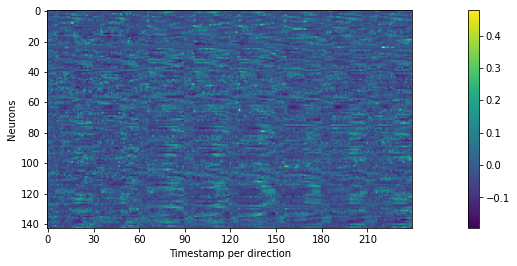

In [ ]:
#CODE YOUR SOLUTION HERE
%matplotlib inline

plt.figure(figsize =(20,4))
plt.imshow(Zscore_frt)
plt.xticks(np.arange(0,numTimebins*8,30))
plt.ylabel('Neurons')
plt.xlabel('Timestamp per direction')
plt.colorbar()

In [ ]:
#FIND SOME HELP HERE

%matplotlib inline

plt.figure(figsize =(20,4))
plt.imshow(#<FILL IN>)
plt.xticks(np.arange(0,numTimebins*8,30))
plt.ylabel('Neurons')
plt.xlabel('Timestamp per direction')
plt.colorbar()

SyntaxError: ignored

> Describe any structure you see in this data.

#YOUR ANSWER HERE

Now that we have centered the data and that we have obtained a 2D matrix, we can calculate and visualise the correlation matrix of the data.

> **Question 3:** Calculate the correlation matrix between neurons and plot it using imshow. 

**Note**: You can check that the corrrelation matrix is correctly calculated, by checking that is has dimension `numNeurons x numNeurons` and that its diagonal is filled with 1s.

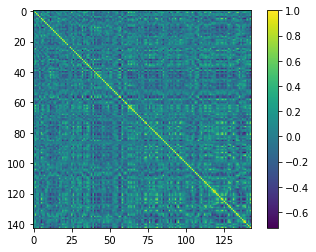

In [ ]:
from scipy.io.matlab.mio5 import ZlibInputStream
#CODE YOUR SOLUTION HERE
%matplotlib inline
#matmul function does the matrix product. Correlation matrix is z-score times transpose of z-score.
Corr = np.matmul(Zscore_frt, Zscore_frt.T)

plt.figure()
plt.imshow(Corr)
plt.colorbar()

In [ ]:
#FIND SOME HELP HERE

%matplotlib inline

# compute correlation matrix. what is the shape of this matrix?
Corr = 

# plot this matrix and make sure it has 1 in the diagonal
plt.figure()
plt.imshow()
plt.colorbar()

# 4. Visualising the neural activity using PCA

We have seen in Exercise 1 that the neural activity, averaged over neurons for the different reach directions, is not always distinct for the different reach directions. Now let's see what happens when we compute PCA over these neural populations.

> **Question 4.1:** Perform an eigendecomposition on the covariance matrix using the python `np.linalg.eig` function and sort the eigenvalues and the eigenvectors.

**Note**: `np.linalg.eig` returns two values. The first one is a 1D array with the eigenvalues and the second one is a 2D matrix with the eigenvectors.

**Tip**: You might want to use `np.sort` and/or `np.argsort` to obtain the sorted version of an array or the corresponding indexes.

In [ ]:
#CODE YOUR SOLUTION HERE
eigvals, eigvects = np.linalg.eig(Corr)


> **Question 4.2:** Plot the sorted eigenvalues in one figure and the percentage of explained variance as we use more sorted eigenvalues in another figure. Comment on the underlying dimensionality of the data.

**Tip:** `np.cumsum` calculates the accumulated sum of all elements in an array. For example, if you pass `[1,2,3,4,5]`, the function will return `[1,3,6,10,15]`.

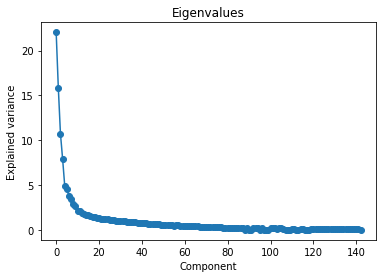

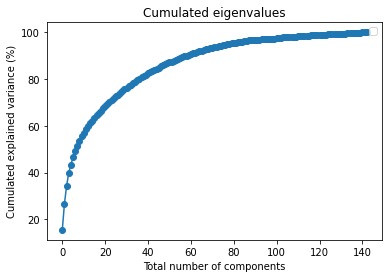

In [ ]:
#CODE YOUR SOLUTION HERE
%matplotlib inline

# plot eignevalues
plt.figure()
plt.plot(eigvals, '-o')
plt.xlabel('Component')
plt.ylabel('Explained variance')
plt.title('Eigenvalues')
plt.show()

cumeigvals = np.cumsum(eigvals)/np.sum(eigvals)
plt.figure()
plt.plot(cumeigvals*100, '-o')
plt.xlabel('Total number of components')
plt.ylabel('Cumulated explained variance (%)')
plt.title('Cumulated eigenvalues')
plt.legend()
plt.show()

In [ ]:
#FIND SOME HELP HERE

%matplotlib inline

# plot eignevalues
plt.figure()
plt.plot(#<FILL IN>, '-o')
plt.xlabel('Component')
plt.ylabel('Explained variance')
plt.title('Eigenvalues')
plt.show()

plt.figure()
plt.plot(#<FILL IN>, '-o')
plt.xlabel('Total number of components')
plt.ylabel('Cumulated explained variance (%)')
plt.title('Cumulated eigenvalues')
plt.legend()
plt.show()

> How many eigenvectors are needed to capture 95% of the variance?


We can see that about 80 components captures 95% of the variance.

We started out with eight high-dimensional neural trajectories, one for each reach direction. Now, we can use PCA to visualize our data in 3D to obtain better insights about the data.

> **Question 5.1:** Project the data onto the first 3 principal components to obtain a representation of the neural trajectories in just 3 variables. Your new matrix should be `(numTimebins * 8) x 3`, which you should reshape into a `numTimebins x 8 x 3` array.

**Tip:** There are several functions to calculate a matricial product, e.g., `np.dot`, `np.matmul` or using `@`. 

In [ ]:
#CODE YOUR SOLUTION HERE
project = np.matmul(Zscore_frt.T, eigvects)

> **Question 5.2:** Plot all 8 trajectories on the same 3D plot, each in a different color.

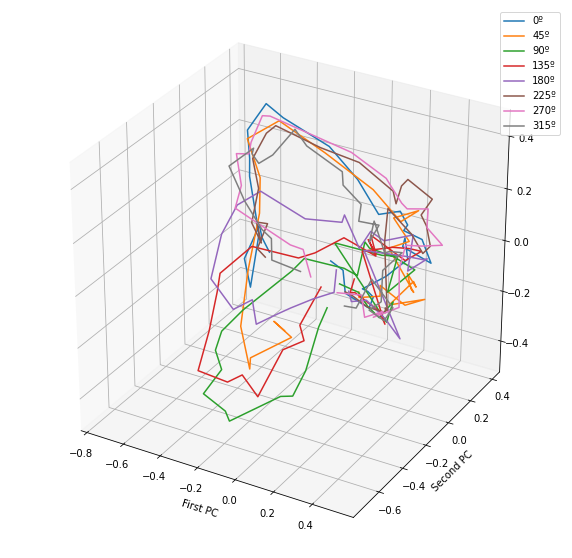

In [ ]:
#CODE YOUR SOLUTION HERE
#%matplotlib qt

angle_str = [str(a) + 'º' for a in np.arange(0,360,45)] 

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
for i in range(0,8):
  ax.plot(project[i*30:(i+1)*30,0], project[i*30:(i+1)*30,1], project[i*30:(i+1)*30,2], label=angle_str[i])
plt.xlabel('First PC')
plt.ylabel('Second PC')
#plt.zlabel('Third PC')
plt.legend()

In [ ]:
#FIND SOME HELP HERE

%matplotlib qt

angle_str = [str(a) + 'º' for a in np.arange(0,360,45)] 

fig = plt.figure(figsize= (10,10))
ax = fig.add_subplot(111, projection='3d')
for i in range(0,8):
    ax.plot(#<FILL IN>)
plt.xlabel('First PC')
plt.ylabel('Second PC')
#plt.zlabel('Third PC')
#plt.legend()

SyntaxError: ignored

> Comment on the structure of the trajectories. Is there any evidence that this population of neurons reflects the different reach directions? What can you say about neural trajectories at the start and end of reach trials in different directions? At what time in the trial are the trajectories maximally different?

#YOUR ANSWER HERE